In [1]:
# make Notebook wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv("immo_data.csv")     

print("df shape:", df.shape)
display(df.info())
display(df.head())

./build_model.ipynb
./.gitignore
./README.md
./immo_data.csv.zip
./immo_data.csv
./capstoneProject__xgboost.ipynb
./capstoneProject_linearRegresion.ipynb
./immo_data_final.csv
./data_analysis.ipynb
./server/Dockerfile
./server/Pipfile.lock
./server/serve.py
./server/train_model.py
./server/Pipfile
./server/model_xg_0.6_30.bin
./server/__pycache__/serve.cpython-38.pyc
./server/.ipynb_checkpoints/build_model-checkpoint.ipynb
./.ipynb_checkpoints/data_analysis-checkpoint.ipynb
./.ipynb_checkpoints/build_model-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject_linearRegresion-checkpoint.ipynb
./.ipynb_checkpoints/capstoneProject__xgboost-checkpoint.ipynb
df shape: (268850, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             26194

None

regio1  serviceCharge                     heatingType  \
0  Nordrhein_Westfalen         245.00                 central_heating   
1      Rheinland_Pfalz         134.00  self_contained_central_heating   
2              Sachsen         255.00                   floor_heating   
3              Sachsen          58.15                district_heating   
4               Bremen         138.00  self_contained_central_heating   

  telekomTvOffer  telekomHybridUploadSpeed  newlyConst  balcony  picturecount  \
0  ONE_YEAR_FREE                       NaN       False    False             6   
1  ONE_YEAR_FREE                       NaN       False     True             8   
2  ONE_YEAR_FREE                      10.0        True     True             8   
3  ONE_YEAR_FREE                       NaN       False     True             9   
4            NaN                       NaN       False     True            19   

   pricetrend  telekomUploadSpeed  ...               regio2  \
0        4.62                10.0  ...             Dortmund   
1        3.47                10.0  ...    Rhein_Pfalz_Kreis   
2        2.72                 2.4  ...              Dresden   
3        1.53                40.0  ...  Mittelsachsen_Kreis   
4        2.46                 NaN  ...               Bremen   

                       regio3  \
0                     Schüren   
1              Böhl_Iggelheim   
2  Äußere_Neustadt_Antonstadt   
3                    Freiberg   
4           Neu_Schwachhausen   

                                         description  \
0  Die ebenerdig zu erreichende Erdgeschosswohnun...   
1  Alles neu macht der Mai – so kann es auch für ...   
2  Der Neubau entsteht im Herzen der Dresdner Neu...   
3  Abseits von Lärm und Abgasen in Ihre neue Wohn...   
4  Es handelt sich hier um ein saniertes Mehrfami...   

                                          facilities heatingCosts  \
0  Die Wohnung ist mit Laminat ausgelegt. Das Bad...          NaN   
1                                                NaN          NaN   
2  * 9 m² Balkon\n* Bad mit bodengleicher Dusche,...          NaN   
3                                                NaN        87.23   
4  Diese Wohnung wurde neu saniert und ist wie fo...          NaN   

   energyEfficiencyClass lastRefurbish  electricityBasePrice  \
0                    NaN           NaN                   NaN   
1                    NaN        2019.0                   NaN   
2                    NaN           NaN                   NaN   
3                    NaN           NaN                   NaN   
4                    NaN           NaN                   NaN   

   electricityKwhPrice   date  
0                  NaN  May19  
1                  NaN  May19  
2                  NaN  Oct19  
3                  NaN  May19  
4                  NaN  Feb20  

[5 rows x 49 columns]

In [2]:

import matplotlib.pyplot as plt

# pd.set_option('max_columns', None)

def plot_barh(dict, title=""):
    full_height = (len(dict.keys())) / 3
    plt.figure(figsize=(10, full_height))
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.title(title)
    pp = plt.barh(list(dict.keys()), list(dict.values()), align='center', alpha=0.5)

    for p in pp:
       width = p.get_width()
       plt.annotate('{}'.format(width),
          xy=(width, p.get_y()),
          xytext=(3, 6),
          textcoords="offset points",
          ha='left', va='center')
    plt.show()

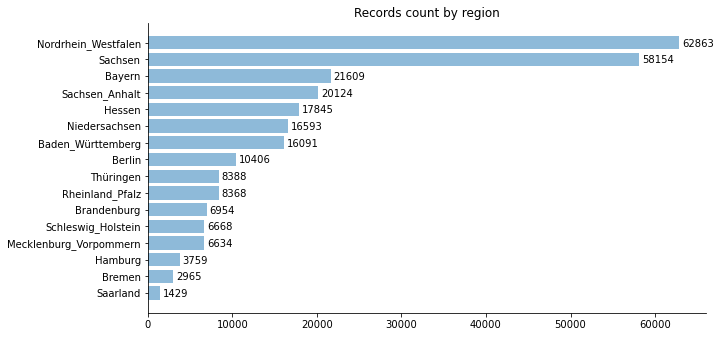

In [3]:
record_count_by_region = df.groupby(['regio1']).size().sort_values(ascending=True).to_dict()
plot_barh(record_count_by_region, "Records count by region")


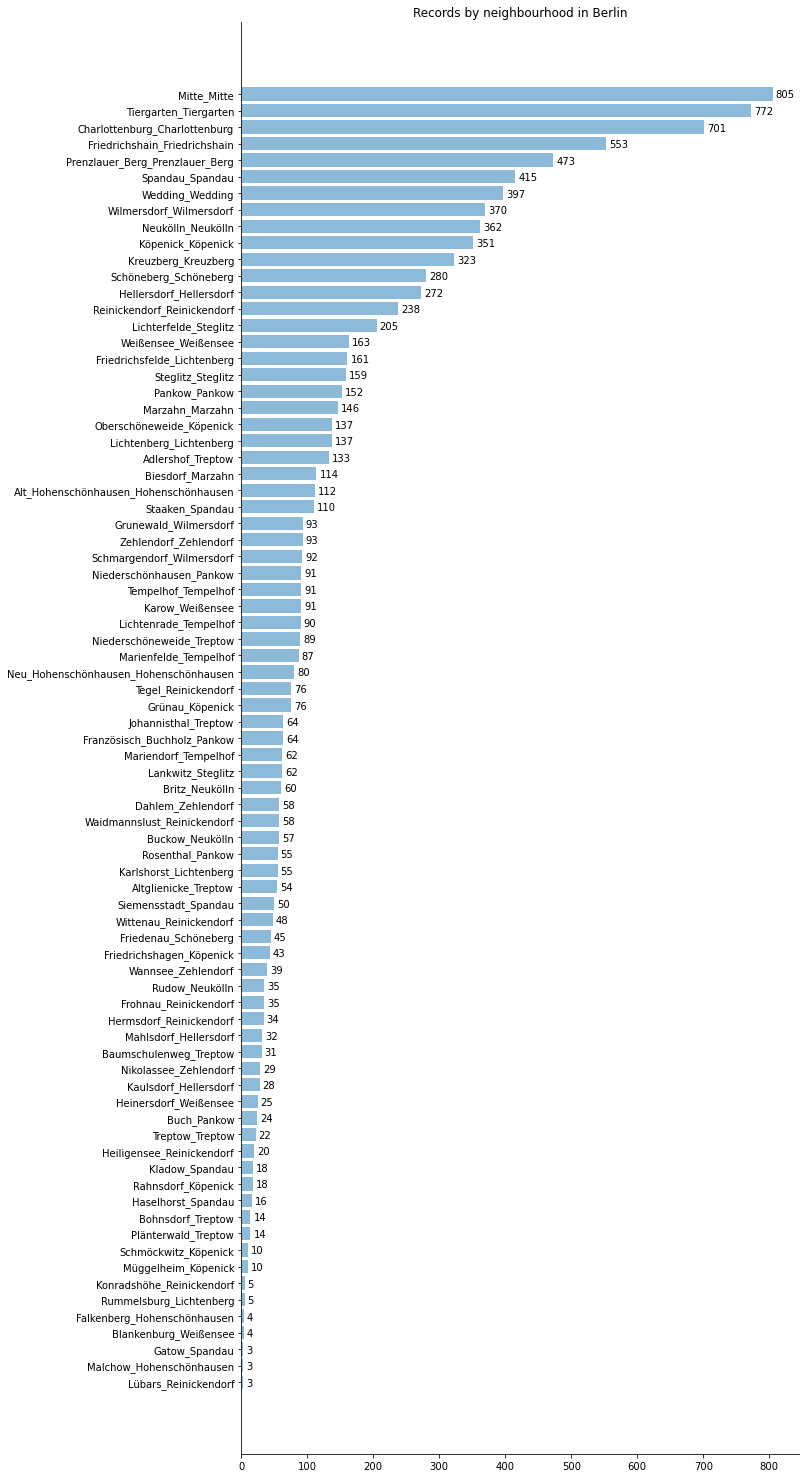

In [4]:

berlinDf = df[df['regio1']=='Berlin']
records_by_neighbourhood_in_berlin = berlinDf.groupby(['regio3']).size().sort_values(ascending=True).to_dict()
plot_barh(records_by_neighbourhood_in_berlin, "Records by neighbourhood in Berlin")


In [5]:
useful_columns = [
    'regio1', 'regio3', 'heatingType', 'newlyConst', 'balcony', 'picturecount', 'totalRent', 'yearConstructed', 'noParkSpaces', 'firingTypes', 'hasKitchen', 'geo_bln', 'cellar', 'baseRent', 'livingSpace', 'condition', 'interiorQual', 'petsAllowed', 'lift', 'typeOfFlat', 'noRooms', 'floor', 'numberOfFloors', 'garden', 'heatingCosts', 'energyEfficiencyClass', 'lastRefurbish', 
]
berlinDf_select = berlinDf[useful_columns]

print("NA records by feature:")
berlinDf_select.isna().sum()


NA records by feature:


regio1                      0
regio3                      0
heatingType              1471
newlyConst                  0
balcony                     0
picturecount                0
totalRent                 662
yearConstructed          1425
noParkSpaces             8393
firingTypes              2284
hasKitchen                  0
geo_bln                     0
cellar                      0
baseRent                    0
livingSpace                 0
condition                2268
interiorQual             4208
petsAllowed              4838
lift                        0
typeOfFlat                804
noRooms                     0
floor                    1100
numberOfFloors           3127
garden                      0
heatingCosts             4769
energyEfficiencyClass    6917
lastRefurbish            7070
dtype: int64

In [6]:

# We will be removing: ['yearConstructed', 'noParkSpaces', 'floor', 'numberOfFloors', 'typeOfFlat', 'heatingCosts', 'lastRefurbish', 'interiorQual']
# because there are too many NA values, and feature are not that important.
berlinDf_select = berlinDf_select.drop(['yearConstructed', 'noParkSpaces', 'floor', 'numberOfFloors', 'typeOfFlat', 'heatingCosts', 'lastRefurbish', 'interiorQual', 'petsAllowed', 'energyEfficiencyClass', 'firingTypes'], axis='columns')

# Also ['regio1', 'totalRent', 'picturecount', 'condition', 'geo_bln'] is not a value that we want to predict on.
berlinDf_select = berlinDf_select.drop(['regio1', 'totalRent', 'picturecount', 'condition', 'geo_bln'], axis='columns')

berlinDf_select.isna().sum()

# We will be keeping ['heatingType', 'firingTypes'] because I still think they are relevant. We will fill NA with NO_INFORMATION and experiemtn with the model.


regio3            0
heatingType    1471
newlyConst        0
balcony           0
hasKitchen        0
cellar            0
baseRent          0
livingSpace       0
lift              0
noRooms           0
garden            0
dtype: int64

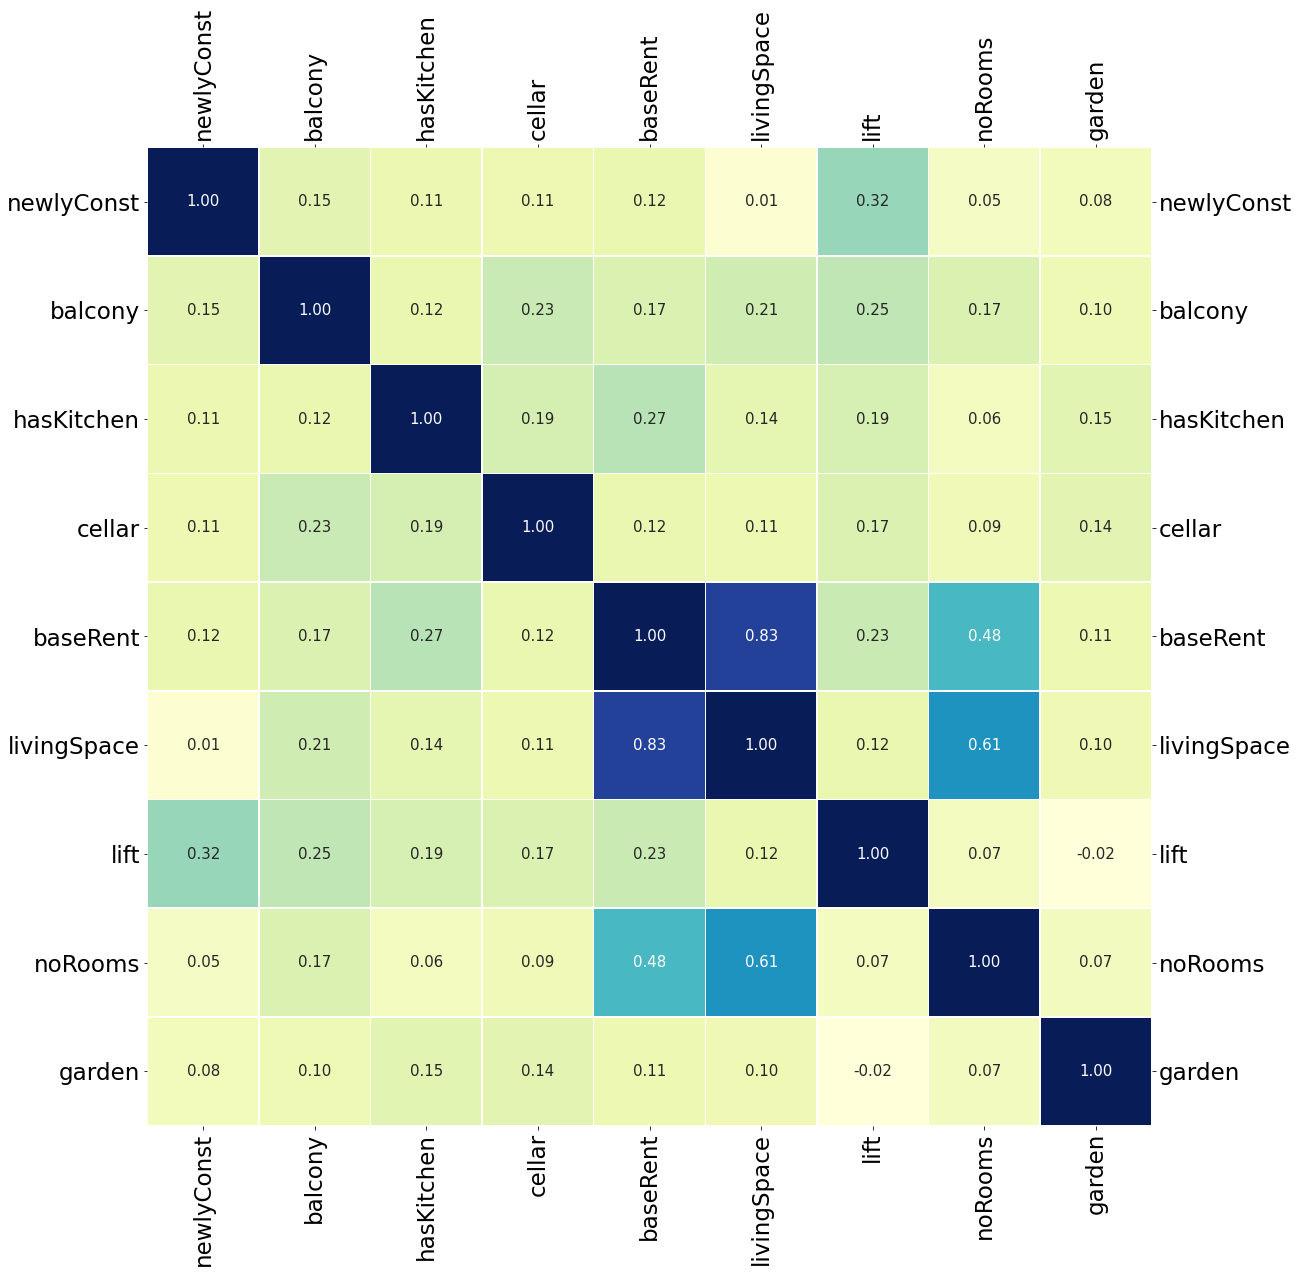

In [7]:
# Show correlation between numerical types:

correlation = berlinDf_select.corr()

import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 18))
sn.heatmap(correlation, annot=True, cbar=False, linewidths=.5, cmap="YlGnBu", fmt='.2f', annot_kws={'size': 15})
plt.tick_params(axis='both', which='major', labelsize=23, labelbottom = True, bottom=True, top = True, labeltop=True, right=True, labelright=True)
plt.xticks(rotation=90) 
plt.yticks(rotation=0) 

plt.show()

# Checking the baseRent corelation with possible features:
# Data shows that livingSpace and noRooms has the highest corelation ~0.8. 
# But constucton year is important too ~0.5.
# Surprisingly seems like heatingCost is also directly corelated with baseRent too. I was expecting this to be inverse corelated.

# Result: We will experiement with following columns for training: livingSpace, noRooms, heatingCosts, hasKitchen, cellar, garden, balcony
#         Plus categorical columns for: heatingType, firingTypes, condition', 'interiorQual', 'petsAllowed, energyEfficiencyClass


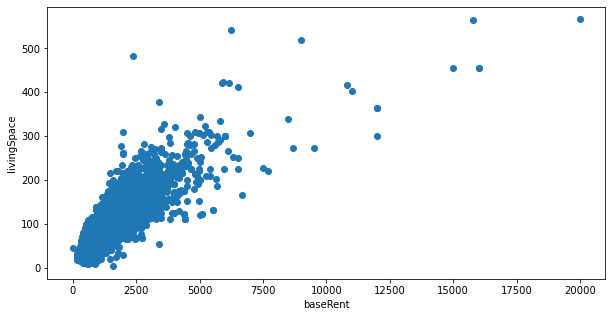

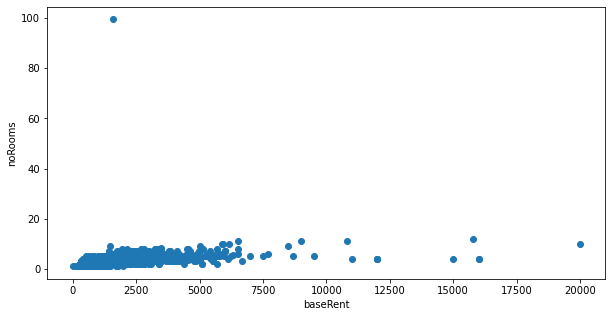

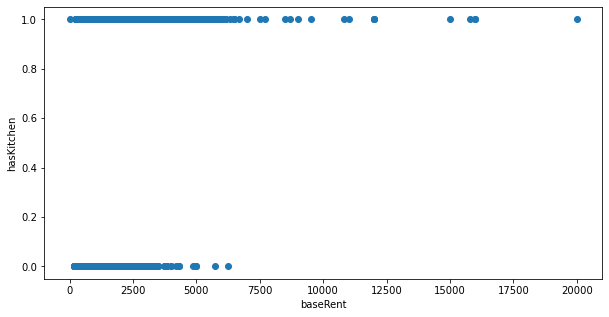

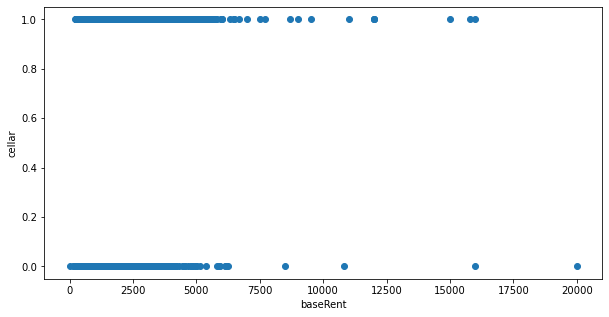

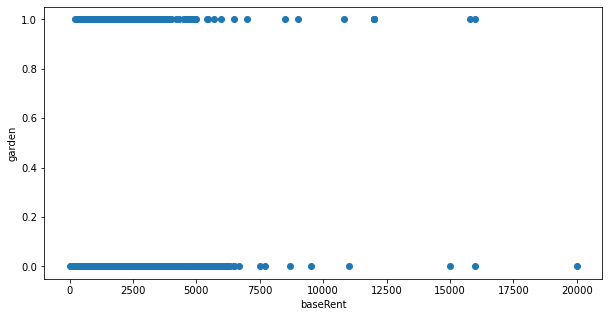

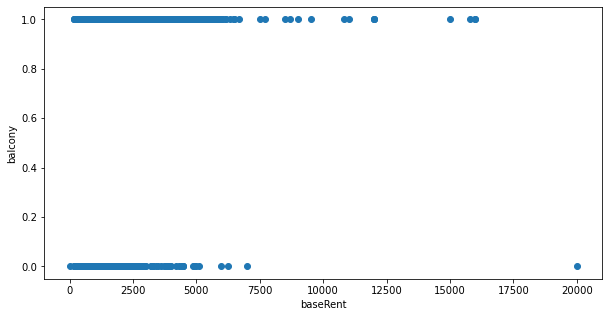

In [8]:
import matplotlib.pyplot as plt


def plot_ticks(x, y, x_label, y_label):
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, 'o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

for c in ["livingSpace", "noRooms", "hasKitchen", "cellar", "garden", "balcony"]:
    plot_ticks(berlinDf_select["baseRent"], berlinDf_select[c], 'baseRent', c)
  

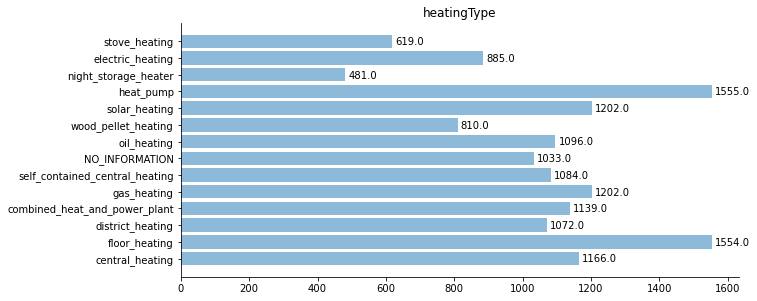

In [9]:
for c in ["heatingType"]:
    berlinDf_select[c] = berlinDf_select[c].fillna("NO_INFORMATION")
    classes = berlinDf_select[c].unique()
    data = {}
    for cl in classes:
        mean = berlinDf_select[berlinDf_select[c]==cl]["baseRent"].mean()
        data[str(cl)] = round(mean,0)
    plot_barh(data, c)


In [10]:
# we need to reduce the heatingType to 2..3 categorical values to not be hard to predict for users
# new 'heating' column: ['low', 'normal', 'high']
# 'NO_INFORMATION' will result in 'heating'='normal'

berlinDf_select['heatingType'].unique()

conditions = [
    (berlinDf_select['heatingType']== 'night_storage_heater'),
    (berlinDf_select['heatingType']== 'solar_heating'),
    
    (berlinDf_select['heatingType']== 'self_contained_central_heating'),
    (berlinDf_select['heatingType']== 'heat_pump'),
    (berlinDf_select['heatingType']== 'gas_heating'),
    (berlinDf_select['heatingType']== 'combined_heat_and_power_plant'),
    (berlinDf_select['heatingType']== 'district_heating'),
    (berlinDf_select['heatingType']== 'floor_heating'),
    (berlinDf_select['heatingType']== 'central_heating'),
    
    (berlinDf_select['heatingType']== 'stove_heating'),
    (berlinDf_select['heatingType']== 'electric_heating'),
    (berlinDf_select['heatingType']== 'wood_pellet_heating'),
    (berlinDf_select['heatingType']== 'oil_heating'),
    
    (berlinDf_select['heatingType']== 'NO_INFORMATION'),
]

result = ['low', 'low', 
          'normal', 'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
          'high', 'high', 'high', 'high',
          'normal']
    
berlinDf_select['heating'] = np.select(conditions, result)
berlinDf_select.drop('heatingType', axis='columns', inplace=True)
berlinDf_select



regio3  newlyConst  balcony  hasKitchen  \
45                    Staaken_Spandau       False     True        True   
61                Weißensee_Weißensee       False    False       False   
77                        Mitte_Mitte        True     True        True   
86                Kreuzberg_Kreuzberg       False     True        True   
87              Tiergarten_Tiergarten        True     True        True   
...                               ...         ...      ...         ...   
268716       Friedrichshagen_Köpenick       False    False       False   
268733                Spandau_Spandau       False    False        True   
268746    Waidmannslust_Reinickendorf       False     True       False   
268758  Charlottenburg_Charlottenburg        True    False        True   
268829                Spandau_Spandau       False     True       False   

        cellar  baseRent  livingSpace   lift  noRooms  garden heating  
45       False    820.00        77.00   True      3.0   False  normal  
61       False    808.00        62.63  False      2.0   False  normal  
77        True   1150.00        46.40   True      2.0   False  normal  
86        True   1200.00        67.00   True      2.5   False  normal  
87        True   1338.43        73.54   True      2.0   False  normal  
...        ...       ...          ...    ...      ...     ...     ...  
268716    True    475.00        57.00  False      1.0   False  normal  
268733   False    750.00        59.82  False      2.0   False  normal  
268746   False    619.00        95.00   True      3.5   False  normal  
268758   False    819.00        28.45   True      1.0    True  normal  
268829   False    577.83        72.64   True      3.0   False  normal  

[10406 rows x 11 columns]

In [11]:
# 'regio3' contains the neighbourhoods and also the subneighbourhoods in following format: "subneighbourhood_neighbourhoods"
# we will only keep neighbourhood to be easier to predit

berlinDf_select['regio3'].unique()
berlinDf_select[['subneighbourhoods','neighbourhoods']] = pd.DataFrame(berlinDf_select.regio3.str.split('_', 1, expand=True))
berlinDf_select['neighbourhoods'] = ['Prenzlauer_Berg' if n == "Berg_Prenzlauer_Berg" else n for n in berlinDf_select['neighbourhoods']]
berlinDf_select['neighbourhoods'] = ['Hohenschönhausen' if n == "Hohenschönhausen_Hohenschönhausen" else n for n in berlinDf_select['neighbourhoods']]
berlinDf_select['neighbourhoods'] = ['Pankow' if n == "Buchholz_Pankow" else n for n in berlinDf_select['neighbourhoods']]

# neighbourhoods to lowercase
berlinDf_select['neighbourhoods'] = [n.lower() for n in berlinDf_select['neighbourhoods']]

#rename  neighbourhoodscolumn name
berlinDf_select.rename(columns = {'neighbourhoods': 'neighbourhood'}, inplace = True)
berlinDf_select.rename(columns = {'subneighbourhoods': 'subneighbourhood'}, inplace = True)

print("subneighbourhoods count:", len(berlinDf_select['subneighbourhood'].unique()))
neighbourhoods = berlinDf_select['neighbourhood'].unique()
print("neighbourhoods count:", len(neighbourhoods))
print("neighbourhoods:", neighbourhoods)

berlinDf_select.drop('regio3', axis='columns', inplace=True)
berlinDf_select.drop('subneighbourhood', axis='columns', inplace=True)

berlinDf_select

subneighbourhoods count: 79
neighbourhoods count: 23
neighbourhoods: ['spandau' 'weißensee' 'mitte' 'kreuzberg' 'tiergarten' 'köpenick'
 'marzahn' 'hohenschönhausen' 'hellersdorf' 'prenzlauer_berg' 'pankow'
 'charlottenburg' 'tempelhof' 'neukölln' 'wilmersdorf' 'wedding'
 'friedrichshain' 'reinickendorf' 'treptow' 'schöneberg' 'lichtenberg'
 'steglitz' 'zehlendorf']


newlyConst  balcony  hasKitchen  cellar  baseRent  livingSpace   lift  \
45           False     True        True   False    820.00        77.00   True   
61           False    False       False   False    808.00        62.63  False   
77            True     True        True    True   1150.00        46.40   True   
86           False     True        True    True   1200.00        67.00   True   
87            True     True        True    True   1338.43        73.54   True   
...            ...      ...         ...     ...       ...          ...    ...   
268716       False    False       False    True    475.00        57.00  False   
268733       False    False        True   False    750.00        59.82  False   
268746       False     True       False   False    619.00        95.00   True   
268758        True    False        True   False    819.00        28.45   True   
268829       False     True       False   False    577.83        72.64   True   

        noRooms  garden heating   neighbourhood  
45          3.0   False  normal         spandau  
61          2.0   False  normal       weißensee  
77          2.0   False  normal           mitte  
86          2.5   False  normal       kreuzberg  
87          2.0   False  normal      tiergarten  
...         ...     ...     ...             ...  
268716      1.0   False  normal        köpenick  
268733      2.0   False  normal         spandau  
268746      3.5   False  normal   reinickendorf  
268758      1.0    True  normal  charlottenburg  
268829      3.0   False  normal         spandau  

[10406 rows x 11 columns]

In [12]:
# make baseRent, livingSpace and noRooms ab Int
berlinDf_select['baseRent'] = berlinDf_select['baseRent'].astype('int').values
berlinDf_select['livingSpace'] = berlinDf_select['livingSpace'].astype('int').values
berlinDf_select['noRooms'] = berlinDf_select['noRooms'].astype('int').values
berlinDf_select

newlyConst  balcony  hasKitchen  cellar  baseRent  livingSpace   lift  \
45           False     True        True   False       820           77   True   
61           False    False       False   False       808           62  False   
77            True     True        True    True      1150           46   True   
86           False     True        True    True      1200           67   True   
87            True     True        True    True      1338           73   True   
...            ...      ...         ...     ...       ...          ...    ...   
268716       False    False       False    True       475           57  False   
268733       False    False        True   False       750           59  False   
268746       False     True       False   False       619           95   True   
268758        True    False        True   False       819           28   True   
268829       False     True       False   False       577           72   True   

        noRooms  garden heating   neighbourhood  
45            3   False  normal         spandau  
61            2   False  normal       weißensee  
77            2   False  normal           mitte  
86            2   False  normal       kreuzberg  
87            2   False  normal      tiergarten  
...         ...     ...     ...             ...  
268716        1   False  normal        köpenick  
268733        2   False  normal         spandau  
268746        3   False  normal   reinickendorf  
268758        1    True  normal  charlottenburg  
268829        3   False  normal         spandau  

[10406 rows x 11 columns]

In [13]:
# We will:
#     - later experiment training by exluding the ["hasKitchen", "cellar", "garden", "balcony"]
#     - remove records with baseRent bigger than 5000 and 7500
#     - remove record with noRooms > 10

berlinDf_final = berlinDf_select
berlinDf_final = berlinDf_final.drop(berlinDf_final[berlinDf_final['baseRent']>5000].index)
berlinDf_final = berlinDf_final.drop(berlinDf_final[berlinDf_final['noRooms']>10].index)


berlinDf_final


newlyConst  balcony  hasKitchen  cellar  baseRent  livingSpace   lift  \
45           False     True        True   False       820           77   True   
61           False    False       False   False       808           62  False   
77            True     True        True    True      1150           46   True   
86           False     True        True    True      1200           67   True   
87            True     True        True    True      1338           73   True   
...            ...      ...         ...     ...       ...          ...    ...   
268716       False    False       False    True       475           57  False   
268733       False    False        True   False       750           59  False   
268746       False     True       False   False       619           95   True   
268758        True    False        True   False       819           28   True   
268829       False     True       False   False       577           72   True   

        noRooms  garden heating   neighbourhood  
45            3   False  normal         spandau  
61            2   False  normal       weißensee  
77            2   False  normal           mitte  
86            2   False  normal       kreuzberg  
87            2   False  normal      tiergarten  
...         ...     ...     ...             ...  
268716        1   False  normal        köpenick  
268733        2   False  normal         spandau  
268746        3   False  normal   reinickendorf  
268758        1    True  normal  charlottenburg  
268829        3   False  normal         spandau  

[10351 rows x 11 columns]

In [14]:
print("Final data:")
display(berlinDf_final.isna().sum())
berlinDf_final.reset_index(drop=True, inplace=True)

pd.set_option('display.max_columns', None)
berlinDf_final

Final data:


newlyConst       0
balcony          0
hasKitchen       0
cellar           0
baseRent         0
livingSpace      0
lift             0
noRooms          0
garden           0
heating          0
neighbourhood    0
dtype: int64

newlyConst  balcony  hasKitchen  cellar  baseRent  livingSpace   lift  \
0           False     True        True   False       820           77   True   
1           False    False       False   False       808           62  False   
2            True     True        True    True      1150           46   True   
3           False     True        True    True      1200           67   True   
4            True     True        True    True      1338           73   True   
...           ...      ...         ...     ...       ...          ...    ...   
10346       False    False       False    True       475           57  False   
10347       False    False        True   False       750           59  False   
10348       False     True       False   False       619           95   True   
10349        True    False        True   False       819           28   True   
10350       False     True       False   False       577           72   True   

       noRooms  garden heating   neighbourhood  
0            3   False  normal         spandau  
1            2   False  normal       weißensee  
2            2   False  normal           mitte  
3            2   False  normal       kreuzberg  
4            2   False  normal      tiergarten  
...        ...     ...     ...             ...  
10346        1   False  normal        köpenick  
10347        2   False  normal         spandau  
10348        3   False  normal   reinickendorf  
10349        1    True  normal  charlottenburg  
10350        3   False  normal         spandau  

[10351 rows x 11 columns]

In [15]:
# Split data

from sklearn.model_selection import train_test_split

def split_dataFrame(df_to_split):
    df_full_train, df_test = train_test_split(df_to_split, test_size=0.2, random_state=11)
    df_train,  df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

    df_full_train = df_full_train.reset_index(drop=True)
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_full_train = df_full_train.baseRent
    y_train = df_train.baseRent
    y_val = df_val.baseRent
    y_test = df_test.baseRent


    del df_full_train["baseRent"]
    del df_train["baseRent"]
    del df_val["baseRent"]
    del df_test["baseRent"]

    # with pd.option_context('display.max_rows', 2, 'display.max_columns', None): 
    #     display(df_test)   

    print("df_to_split length: ", len(df_to_split))
    print()
    print("df_full_train length: ", len(df_full_train))
    print("df_train length: ", len(df_train))
    print("df_val length: ", len(df_val))
    print("df_test length: ", len(df_test))
    print()
    print("y_full_train length: ", len(y_full_train))
    print("y_train length: ", len(y_train))
    print("y_val length: ", len(y_val))
    print("y_test length: ", len(y_test))
    
    return df_full_train, df_train, df_val, df_test, y_full_train, y_train, y_val, y_test

split_dataFrame(berlinDf_select)
""

df_to_split length:  10406

df_full_train length:  8324
df_train length:  6243
df_val length:  2081
df_test length:  2082

y_full_train length:  8324
y_train length:  6243
y_val length:  2081
y_test length:  2082


''